# Chicago Restaurant Licenses Analysis
### Eugenio Gallastegui

This analysis aims at answering the question whether or not there is a correlation between the number of restaurant licenses issued in Chicago and the average houshold income per zone. In other words, are richest zones better for restaurants?   

## Setting and Cleaning up

In [1]:
#Import dependencies and read csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set up figure specifications
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'

# Import Data and visualize firsts rows
df = pd.read_csv("Chicago_Licenses.csv")
df.head()

/Users/gallasteguicrino/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,22308-20060816,1723393,29481,1,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,3741 S PULASKI RD 1,CHICAGO,IL,60623,...,08/16/2006,08/15/2007,08/10/2006,08/11/2006,AAI,NaN,NaN,41.825320,-87.723960,"(41.82531992987547, -87.72395999659746)"
1,1620668-20160516,2455262,295026,1,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,558 W ROOSEVELT RD,CHICAGO,IL,60607,...,05/16/2016,05/15/2018,05/18/2016,08/30/2016,AAI,NaN,NaN,41.867339,-87.641590,"(41.86733856638269, -87.64159005699716)"
2,2368602-20160616,2460909,291461,3,"PROJECT: VISION , INC.","PROJECT : VISION , INC",2301 S ARCHER AVE 1 1,CHICAGO,IL,60616,...,06/16/2016,06/15/2017,06/21/2016,06/22/2016,AAC,08/30/2016,NaN,41.850843,-87.638734,"(41.85084294374687, -87.63873424399071)"
3,2060891-20141016,2353257,357247,1,FOLASHADE'S CLEANING SERVICE INC.,FOLASHADE'S CLEANING SERVICE INC.,1965 BERNICE RD 1 1SW,LANSING,IL,60438,...,10/16/2014,10/15/2016,04/01/2016,04/01/2016,AAI,NaN,38.0,41.951316,-87.678586,"(41.95131555606832, -87.67858578019546)"
4,1144216-20070516,1804790,147,63,WALGREEN CO.,Walgreens # 05192,9148 S COMMERCIAL AVE 1ST,CHICAGO,IL,60617,...,05/16/2007,05/15/2008,05/10/2007,05/11/2007,AAI,NaN,5.0,41.728622,-87.551366,"(41.72862173556932, -87.55136646594693)"


In [2]:
# Create new dataframe with the variables we'll use. 
df_1 = df[['LICENSE NUMBER', "LEGAL NAME", 'DOING BUSINESS AS NAME', "LICENSE CODE", "APPLICATION TYPE", "CITY", "WARD", "ZIP CODE", "DATE ISSUED", "LATITUDE", "LONGITUDE", "LOCATION"]]
df_1.head()

,LICENSE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,LICENSE CODE,APPLICATION TYPE,CITY,WARD,ZIP CODE,DATE ISSUED,LATITUDE,LONGITUDE,LOCATION
0,22308.0,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,1010,RENEW,CHICAGO,14.0,60623,08/11/2006,41.825320,-87.723960,"(41.82531992987547, -87.72395999659746)"
1,1620668.0,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,1010,RENEW,CHICAGO,25.0,60607,08/30/2016,41.867339,-87.641590,"(41.86733856638269, -87.64159005699716)"
2,2368602.0,"PROJECT: VISION , INC.","PROJECT : VISION , INC",1625,RENEW,CHICAGO,25.0,60616,06/22/2016,41.850843,-87.638734,"(41.85084294374687, -87.63873424399071)"
3,2060891.0,FOLASHADE'S CLEANING SERVICE INC.,FOLASHADE'S CLEANING SERVICE INC.,1010,RENEW,LANSING,NaN,60438,04/01/2016,41.951316,-87.678586,"(41.95131555606832, -87.67858578019546)"
4,1144216.0,WALGREEN CO.,Walgreens # 05192,1010,RENEW,CHICAGO,10.0,60617,05/11/2007,41.728622,-87.551366,"(41.72862173556932, -87.55136646594693)"


In [22]:
# Drop NaN values
df_1 = df_1.dropna()
df_1.shape

(880536, 12)

In [4]:
# Filter by city (Chicago) 
df_2 = df_1.query('CITY == "CHICAGO"')


In [5]:
# Create separate variables containing the year
df_2['YEAR'] = pd.DatetimeIndex(df_2['DATE ISSUED']).year
#df_2['MONTH'] = pd.DatetimeIndex(df_2['DATE ISSUED']).month
df_2.head()

/Users/gallasteguicrino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LICENSE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,LICENSE CODE,APPLICATION TYPE,CITY,WARD,ZIP CODE,DATE ISSUED,LATITUDE,LONGITUDE,LOCATION,YEAR
0,22308.0,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,1010,RENEW,CHICAGO,14.0,60623,08/11/2006,41.825320,-87.723960,"(41.82531992987547, -87.72395999659746)",2006
1,1620668.0,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,1010,RENEW,CHICAGO,25.0,60607,08/30/2016,41.867339,-87.641590,"(41.86733856638269, -87.64159005699716)",2016
2,2368602.0,"PROJECT: VISION , INC.","PROJECT : VISION , INC",1625,RENEW,CHICAGO,25.0,60616,06/22/2016,41.850843,-87.638734,"(41.85084294374687, -87.63873424399071)",2016
4,1144216.0,WALGREEN CO.,Walgreens # 05192,1010,RENEW,CHICAGO,10.0,60617,05/11/2007,41.728622,-87.551366,"(41.72862173556932, -87.55136646594693)",2007
5,2488345.0,"BURKS HEATING AND COOLING SOLUTIONS, LLC","BURKS HEATING AND COOLING SOLUTIONS, LLC",4404,ISSUE,CHICAGO,15.0,60636,08/30/2016,41.789617,-87.669472,"(41.78961679000226, -87.66947199630827)",2016


In [6]:

df_2 = df_2[df_2.YEAR != 2019]
df_2 = df_2[df_2.YEAR != 2018]
df_2 = df_2[df_2.YEAR != 2017]
df_2 = df_2[df_2.YEAR != 2016]

## Exploratory Analysis 

### The State of Licenses in General

Text(0.5, 1.0, 'Total New Licenses in General (2002-20015)')

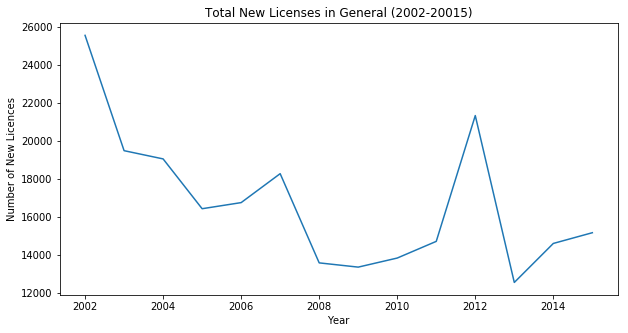

In [7]:
#Plot total number of licenses issued by year.
rcParams['figure.figsize'] = 10,5
license_number = df_2.groupby(["LICENSE NUMBER"]).first()
license_number_year = license_number.groupby(["YEAR"]).count()
plt.plot("LEGAL NAME", data=license_number_year)
plt.xlabel("Year")
plt.ylabel("Number of New Licences")
plt.title("Total New Licenses in General (2002-20015)")

### Limiting results to only those of Restaurant Licenses (1006)

In [8]:
# Filter by license code (1006 corresponds to restaurants)
df_3 = df_2[df_2['LICENSE CODE'] == 1006]
df_3 = df_3.reset_index(drop=True)
#Reamining rows
df_3.shape

(122500, 13)

## Distribution of Restaurant Licenses Issued by Ward

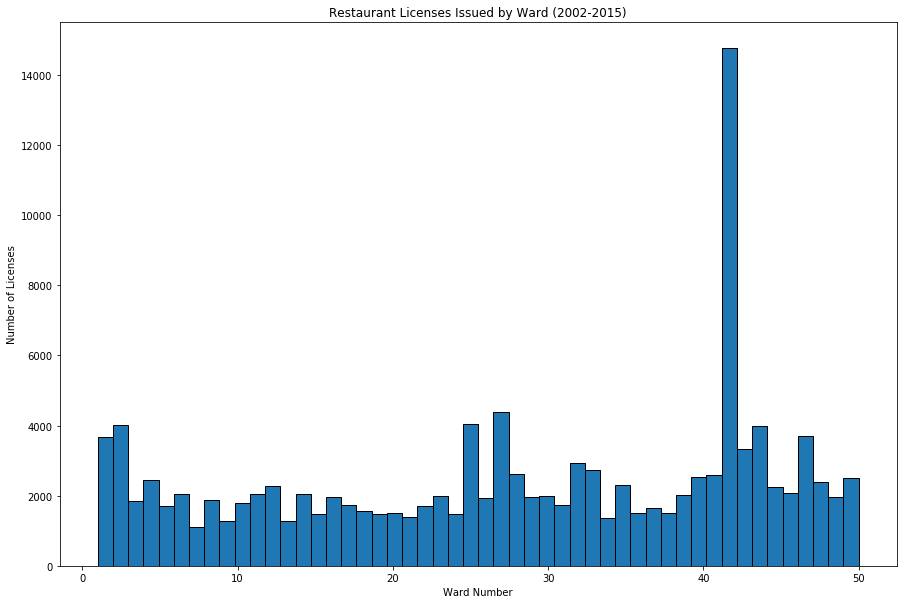

In [9]:
# Set chart specifications
rcParams['figure.figsize'] = 15,10
#Grab the variable 
WARD = df_3['WARD']
#Plot the distribution with a histogram
plt.hist(WARD, 50)
# Add labels
plt.xlabel('Ward Number')
plt.ylabel('Number of Licenses')
plt.title('Restaurant Licenses Issued by Ward (2002-2015)')
# As this finding pertains to our subject matter, save it to use it later. 
plt.savefig('Restaurant_Licenses_Distribution_by_Ward.png')

##### The chart above shows an overconcentration of Licenses in the 42nd. Ward!

## Tendencies of Renewed and New Issued Restaurant Licenses

In [10]:
# Separate Liceneses according to their type. 
renew = df_3[df_3['APPLICATION TYPE'] == 'RENEW']
issue = df_3[df_3['APPLICATION TYPE'] == 'ISSUE']


## Number of Renewed Restaurant Liceneses

Text(0.5, 1.0, 'Restaurant Renewed Licenses (2002-2015)')

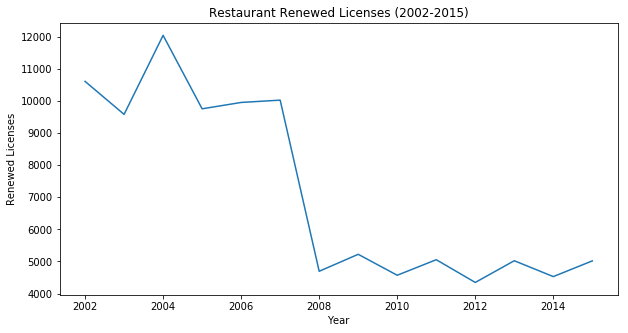

In [11]:
rcParams['figure.figsize'] = 10,5
licenses_renew = renew.groupby(["YEAR"]).count()
plt.plot("WARD", data= licenses_renew)
plt.xlabel('Year')
plt.ylabel('Renewed Licenses')
plt.title('Restaurant Renewed Licenses (2002-2015)')

## Number of New Issued Restaurant Liceneses 

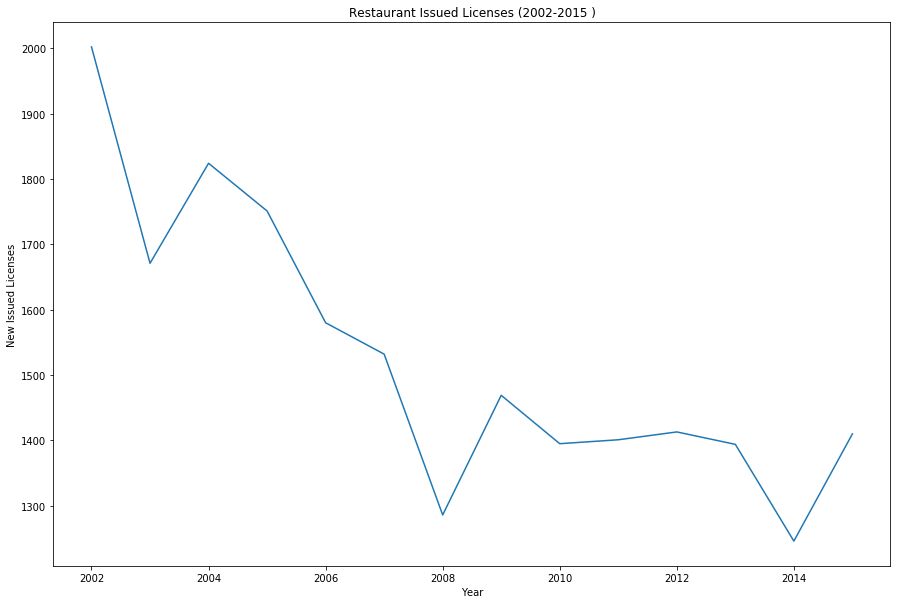

In [12]:
rcParams['figure.figsize'] = 15,10
licenses_issue = issue.groupby(["YEAR"]).count()
plt.plot("WARD", data= licenses_issue)
plt.xlabel('Year')
plt.ylabel('New Issued Licenses')
plt.title('Restaurant Issued Licenses (2002-2015 )')
plt.savefig('New_Restaurants_Liceneses_Issued.png')

## Distribution of Income by Community Area

In [13]:
df = pd.read_csv("Socioeconomic_indicators_Chicago.csv")
df = df.sort_values('PER CAPITA INCOME ', ascending = False)
df.head()

,COMMUNITY AREA,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
7,8,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1
6,7,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2
31,32,Loop,1.5,14.7,5.7,3.1,13.5,65526,3
5,6,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5
32,33,Near South Side,1.3,13.8,4.9,7.4,21.8,59077,7


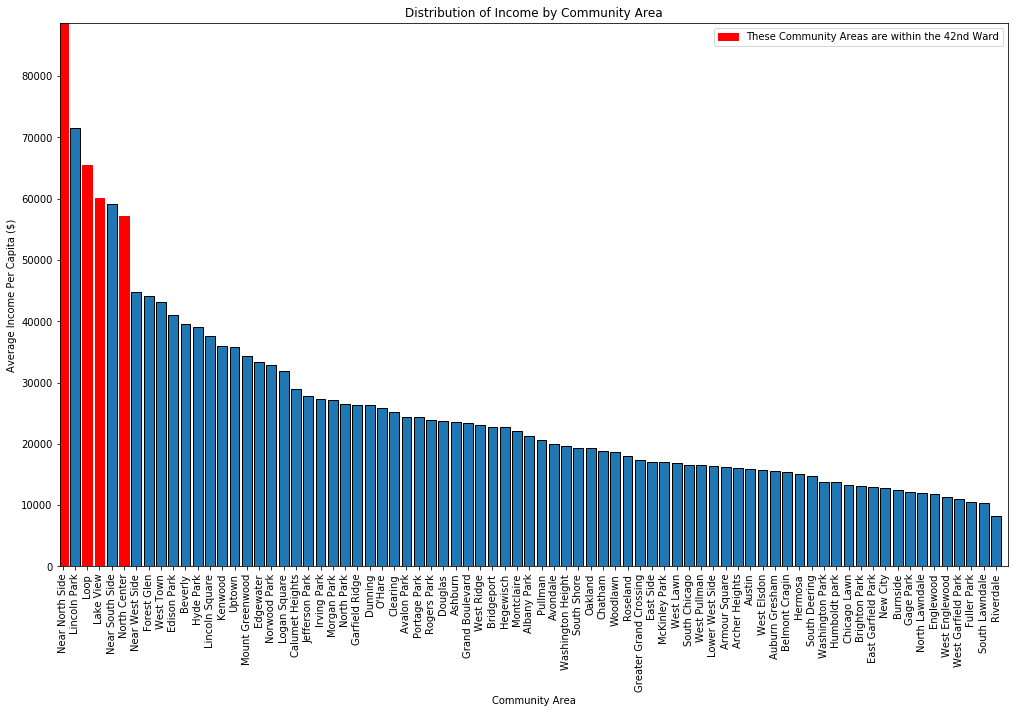

In [14]:
import matplotlib.patches as mpatches
# Set Variables and Specifications
income = df['PER CAPITA INCOME ']
name = df['COMMUNITY AREA NAME']
x_axis = np.arange(len(name))
plt.figure(figsize=(17,10))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, name, rotation="vertical")

#Plot Chart
barlist= plt.bar(x_axis, income)

# Color Community Areas Within 42nd Ward
ca1 = barlist[0].set_color('r')
ca2 = barlist[2].set_color('r')
ca3 =barlist[3].set_color('r')
ca4 =barlist[5].set_color('r')

#Chart Limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(-0.25, max(income)+5)

#Labels
plt.xlabel('Community Area')
plt.ylabel('Average Income Per Capita ($)')
plt.title('Distribution of Income by Community Area')

# Annotation
red_patch = mpatches.Patch(color='red', label='These Community Areas are within the 42nd Ward')
plt.legend(handles=[red_patch])

#Save chart
plt.savefig('Income_Distribution_by_Community.png')

# Correlation Between Average Household Income and Restaurant Licenses 
# by Zip Code 

In [17]:
zip_income = pd.read_csv('chicago_zip_income_1.csv')
zip_income.dropna()
zip_income.head()

,ZIP CODE,LICENSES 2015,LICENSES 2002-18,HOUSEHOLD INCOME
0,60601.0,65.0,1309.0,156723.0
1,60602.0,31.0,534.0,172492.0
2,60603.0,44.0,720.0,121184.0
3,60604.0,26.0,552.0,114724.0
4,60605.0,57.0,877.0,157763.0


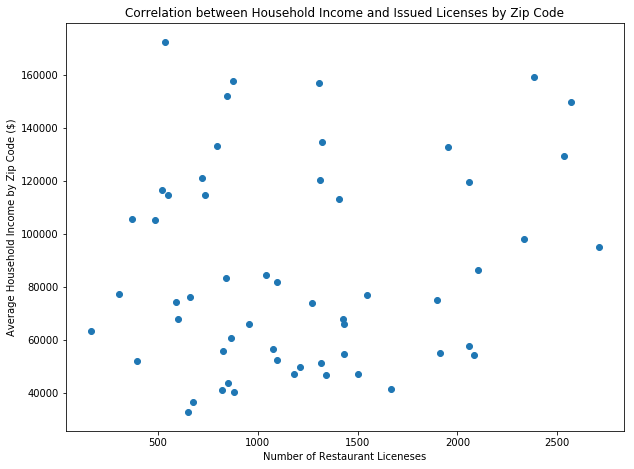

In [19]:
x = zip_income['LICENSES 2002-18']
Y = zip_income['HOUSEHOLD INCOME']

rcParams['figure.figsize'] = 10,7.5
plt.scatter(x, Y)
plt.xlabel('Number of Restaurant Liceneses')
plt.ylabel('Average Household Income by Zip Code ($)')
plt.title('Correlation between Household Income and Issued Licenses by Zip Code')
plt.savefig('correlation_income_licenses.png')

In [20]:
zip_income['HOUSEHOLD INCOME'].corr(zip_income['LICENSES 2002-18'])

0.14850736258242161

## Map of Distribution of Restaurant Licenses

## Initializing 

In [23]:
# Import dependencies to plot maps. 
import folium
from folium import IFrame, FeatureGroup, LayerControl, Map, Marker, plugins
import seaborn as sns

In [24]:
# Chicago Coordinates
Chicago_COORDINATES = (41.895140898, -87.624255632)

In [26]:
# Read Dataset
df = pd.read_csv("Chicago_Licenses.csv")


## Cleaning Data

In [27]:
# Limit the number of variables to use. 
df = df[['LICENSE NUMBER', "LEGAL NAME", 'DOING BUSINESS AS NAME', "LICENSE CODE", "CITY", "WARD", "ZIP CODE"]]
df.head()

,LICENSE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,LICENSE CODE,CITY,WARD,ZIP CODE
0,22308.0,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,1010,CHICAGO,14.0,60623
1,1620668.0,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,1010,CHICAGO,25.0,60607
2,2368602.0,"PROJECT: VISION , INC.","PROJECT : VISION , INC",1625,CHICAGO,25.0,60616
3,2060891.0,FOLASHADE'S CLEANING SERVICE INC.,FOLASHADE'S CLEANING SERVICE INC.,1010,LANSING,NaN,60438
4,1144216.0,WALGREEN CO.,Walgreens # 05192,1010,CHICAGO,10.0,60617


In [28]:
# Filter results by city (Chicago)
df = df.query('CITY == "CHICAGO"')
# Filter by license type( Restaurants = 1006)
df = df[df['LICENSE CODE'] == 1006]

In [29]:
# Detect missing data
percent_missing = df.isnull().sum()/ len(df) * 100
percent_missing

LICENSE NUMBER            0.000000
LEGAL NAME                0.000000
DOING BUSINESS AS NAME    0.000000
LICENSE CODE              0.000000
CITY                      0.000000
WARD                      0.088864
ZIP CODE                  0.045842
dtype: float64

In [30]:
#Drop missing and null data
df =df.dropna()
# Check if some null data remains
df.isnull().sum()

LICENSE NUMBER            0
LEGAL NAME                0
DOING BUSINESS AS NAME    0
LICENSE CODE              0
CITY                      0
WARD                      0
ZIP CODE                  0
dtype: int64

In [31]:
# Convert from floating to integer...
df['WARD'] = df['WARD'].astype(int)
# ... and from integer to string
df['WARD'] = df['WARD'].astype(str)

## Mapping

In [32]:
# Import geo-data
ward_geo = 'Boundaries_Wards.geojson'

In [37]:
#calculating total number of licenses per Ward
WardData = pd.DataFrame(df['WARD'].value_counts().astype(int))
WardData.to_json('Ward_Map.json')
WardData = WardData.reset_index()
WardData.columns = ['WARD', 'LICENSE ID']
 
#creating choropleth map for Chicago Wards
map1 = folium.Map(location=Chicago_COORDINATES, zoom_start=11)
map1.choropleth(geo_data = ward_geo,
                name='Licenses by Ward',
                data_out = 'Ward_Map.json', 
                data = WardData,
                columns = ['WARD', "LICENSE ID"],
                key_on = 'feature.properties.ward',
                fill_color = 'Purples', 
                fill_opacity = 0.9, 
                line_opacity = 0.2,
                threshold_scale=[0, 4000, 8000, 12000, 16000, 20000],
                legend_name = 'Number of Restaurant Licenses')

folium.LayerControl(collapsed=True).add_to(map1)



In [38]:
map1